<a href="https://colab.research.google.com/github/VictoriaCar/BA820---College-Scorecard-/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

data = pd.read_csv("MERGED2022_23_PP.csv")
data.info()
data.isnull().sum()
#data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'MERGED2022_23_PP.csv'

In [ ]:
percent_missing_values = data.isnull().sum() / len(data) * 100
columns_with_high_missing = percent_missing_values[percent_missing_values > 90]
num_columns_with_high_missing = len(columns_with_high_missing)


print(f"Number of columns with more than 90% missing values: {num_columns_with_high_missing}")

Number of columns with more than 90% missing values: 2102


In [ ]:
# Install required packages for PDF conversion -- could take over a minute
!apt update > /dev/null 2>&1
!apt install texlive-xetex pandoc > /dev/null 2>&1
!pip install nbconvert > /dev/null 2>&1

import re, pathlib, shutil
notebook_path = '/content/drive/MyDrive/ColabNotebooks' # ← CHANGE THIS TO THE FOLDER ON GOOGLE DRIVE WITH YOUR COLAB NOTEBOOK
notebook_name = 'EDA.ipynb' # ← CHANGE THIS TO THE NAME OF YOUR COLAB NOTEBOOK
!jupyter nbconvert "{notebook_path}/{notebook_name}" --to pdf --output-dir "{notebook_path}"

# Optionally, download the exported PDF
from google.colab import files
pdf_name = notebook_path + '/' + notebook_name.replace('.ipynb', '.pdf')
files.download(pdf_name)

[NbConvertApp] WARNING | pattern '/content/drive/MyDrive/ColabNotebooks/EDA.ipynb' matched no files
[NbConvertApp] Making directory /content/drive/MyDrive/ColabNotebooks
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to

FileNotFoundError: Cannot find file: /content/drive/MyDrive/ColabNotebooks/EDA.pdf

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = data.loc[:, data.isnull().mean() < 0.90]  # Keep only columns with <90% missing values

In [ ]:
df_numeric = data.select_dtypes(include=[np.number])

corr_matrix = df_numeric.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
existing_to_drop = [col for col in to_drop if col in df.columns]
df = df.drop(columns=existing_to_drop)

In [ ]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)
df_numeric_reduced = df_numeric[df_numeric.columns[selector.fit(df_numeric).get_support()]]

df = df.drop(columns=df.columns).join(df_numeric_reduced)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_variance_threshold.py:114: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

pca = PCA(n_components=50)
df_pca = pca.fit_transform(df_scaled)

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3215 entries, 0 to 3214
Columns: 560 entries, UNITID to ACTMT50
dtypes: float64(542), int64(18)
memory usage: 13.7 MB


In [ ]:
print("\n".join(df.columns))

UNITID
OPEID
OPEID6
MAIN
NUMBRANCH
PREDDEG
HIGHDEG
CONTROL
ST_FIPS
REGION
LOCALE
LATITUDE
LONGITUDE
CCBASIC
CCUGPROF
CCSIZSET
HBCU
PBI
AANAPII
HSI
MENONLY
RELAFFIL
ADM_RATE
ADM_RATE_ALL
SATVR25
SATVR75
SATMT25
SATMT75
ACTCM25
ACTCM75
ACTEN25
ACTEN75
ACTMT25
ACTMT75
SAT_AVG
SAT_AVG_ALL
PCIP12
PCIP24
PCIP38
PCIP39
PCIP50
PCIP51
PCIP52
CIP01CERT1
CIP01CERT2
CIP01ASSOC
CIP01BACHL
CIP03CERT1
CIP03CERT2
CIP03ASSOC
CIP03BACHL
CIP04CERT1
CIP04CERT2
CIP04ASSOC
CIP04BACHL
CIP05CERT1
CIP05ASSOC
CIP05BACHL
CIP09CERT1
CIP09CERT2
CIP09ASSOC
CIP09BACHL
CIP10CERT1
CIP10CERT2
CIP10ASSOC
CIP10BACHL
CIP11CERT1
CIP11CERT2
CIP11ASSOC
CIP11CERT4
CIP11BACHL
CIP12CERT1
CIP12CERT2
CIP12ASSOC
CIP12CERT4
CIP12BACHL
CIP13CERT1
CIP13CERT2
CIP13ASSOC
CIP13BACHL
CIP14CERT1
CIP14CERT2
CIP14ASSOC
CIP14BACHL
CIP15CERT1
CIP15CERT2
CIP15ASSOC
CIP15CERT4
CIP15BACHL
CIP16CERT1
CIP16CERT2
CIP16ASSOC
CIP16BACHL
CIP19CERT1
CIP19CERT2
CIP19ASSOC
CIP19BACHL
CIP22CERT1
CIP22CERT2
CIP22ASSOC
CIP22BACHL
CIP23CERT1
CIP23CERT2
CIP23

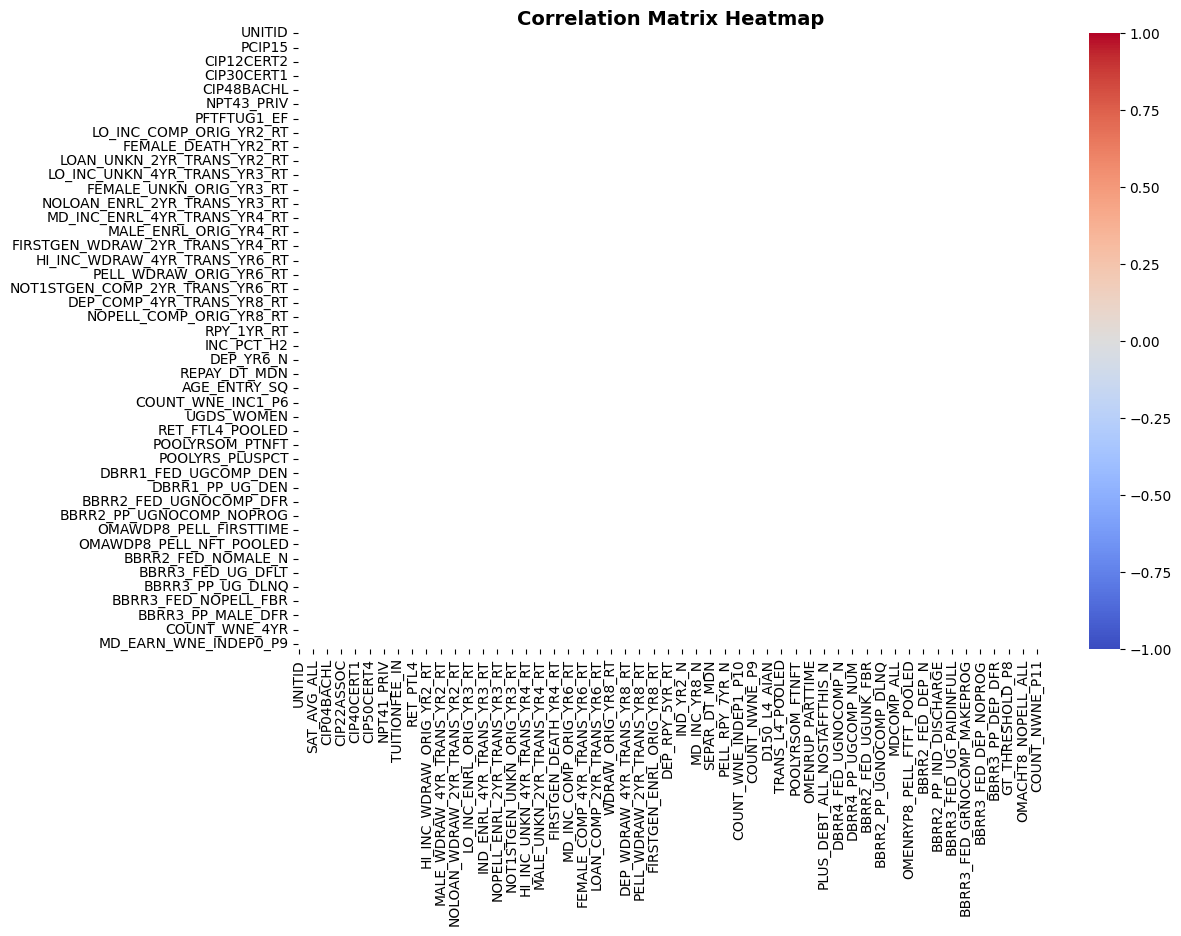

In [ ]:
data_numeric = data.select_dtypes(include=[np.number])

corr_matrix = data_numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix Heatmap", fontsize=14, fontweight="bold")
plt.show()

In [ ]:
# Normalize data with StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Dimensionality reduction with PCA
# Goal is to get down to 100
from sklearn.decomposition import PCA

pca = PCA(n_components=100)
df_pca = pca.fit_transform(df_scaled)

# transform the data
transformed_data = pca.transform(df_scaled)
transformed_data_df = pd.DataFrame(transformed_data)

# Rename the columns
transformed_data_df.columns = [f"PC{i+1}" for i in range(df_numeric.shape[1])]
transformed_data_df

pca.explained_variance_ #ratio_
transformed_data_df.describe()

In [ ]:
# Look at variance of data along each PC
pca.explained_variance_ #ratio_
transformed_data_df.describe()

In [ ]:
# Look at PCA components
components_df = pd.DataFrame(pca.components_)

# Rename the columns
components_df.columns = df_numeric.columns

# Rename the rows
components_df.index = [f"PC{i+1}" for i in range(components_df.shape[0])]
components_df

In [ ]:
# Visualize magnitude of PC's
sns.heatmap(components_df, annot=True, cmap="vlag" , vmin=-1, vmax=1)

In [ ]:
# Next step: look at explained variance of the model and print the scree plot using psynlig
!pip install psynlig

In [ ]:
# Scree
from matplotlib import pyplot as plt
from psynlig import (
    pca_explained_variance,
    pca_explained_variance_bar,
    )

_, ax = pca_explained_variance(pca,  marker='o', markersize=8, alpha=0.8)

# Let's add a line at an explained variance of 90%
ax.axhline(y=0.9, color='r', linestyle='--', linewidth=2)

plt.show()

pca_explained_variance_bar(
    pca,
    width=0.2,
    alpha=0.8,
    color='black',
)

plt.show()

In [ ]:
# Computing the Loadings
# Plot the scaled version of these components by scaling each of the components in proportion to their standard deviations (i.e., square root of model.explained_variance_)

import numpy as np
loadings = components_df.mul(np.sqrt(model.explained_variance_), axis=0)

loadings_df = pd.DataFrame(loadings)
loadings_df

In [ ]:
# Let's overlay the PCA components on top of the original features

from yellowbrick.features import PCA as PCA_visualizer

visualizer = PCA_visualizer(featureslist=df_numeric.columns,
                            projection=2,
                            proj_features=True,
                            heatmap=True
                            )
visualizer.fit_transform(pd.DataFrame(normalized_data, columns=df_numeric.columns))
visualizer.show()

In [ ]:
from psynlig import pca_2d_scores

loading_settings = {
    'adjust_text': True,
    'add_text': True,
}

pca_2d_scores(
    pca,
    transformed_data,
    xvars=df_numeric.columns,
    select_components={(1, 2)},
    loading_settings=loading_settings,
    s=200,
    alpha=.8,
    cmap_class='Dark2',
)


plt.show()

In [ ]:
# Attempting non-linear dimensionality reduction with UMAP
import umap
import plotly.express as px

# Use UMAP to reduce the dimensionality of the data
reducer = umap.UMAP(n_components=100) # n_neighbors=15, min_dist=0.1
umap_embeddings = reducer.fit_transform(normalized_data)

# Create a DataFrame for the UMAP embeddings
umap_df = pd.DataFrame(umap_embeddings, columns=["UMAP1", "UMAP2", "UMAP3", ...]) #

# Add ingredients column to the UMAP DataFrame for hover information
umap_df["ingredients"] = df["ingredients"][valid_indices].values

# Create a 3D scatter plot with hover information
fig = px.scatter_3d(
    umap_df,
    x="UMAP1",
    y="UMAP2",
    z="UMAP3",
    hover_name="ingredients",  # Show ingredients on hover
    opacity=0.5,
    color_discrete_sequence=px.colors.qualitative.Set2
)

# Customize marker size and opacity
fig.update_traces(marker=dict(size=3, opacity=0.7))

# Display the plot
fig.show()